### INITIALIZATION

In [1]:
from ipywidgets import interact

from baselines_plot import frequency_plot, schedule, scatter_plot, time_table
from util import *
import time

%matplotlib inline

bc = KTIBruggCables()

### Get Opportunities and Batches

In [2]:
opportunities = bc.get_opportunities()
batches = bc.get_batches()

### BASELINE GENERATION

In [5]:
start = time.clock()
baselines = bc.get_baselines()
print(len(baselines), 'Baselines Generated in {0:.3f} sec.\n'
                                                .format(time.clock()-start))

AttributeError: 'DataFrame' object has no attribute 'cable_area'

### FITNESS: compute the fitness for the baselines

In [4]:
start = time.clock()
fitness_b = bc.compute_fitness(baselines)
print('Fitness Computed in {0:.3f} sec.\n'.format(time.clock()-start))

NameError: name 'baselines' is not defined

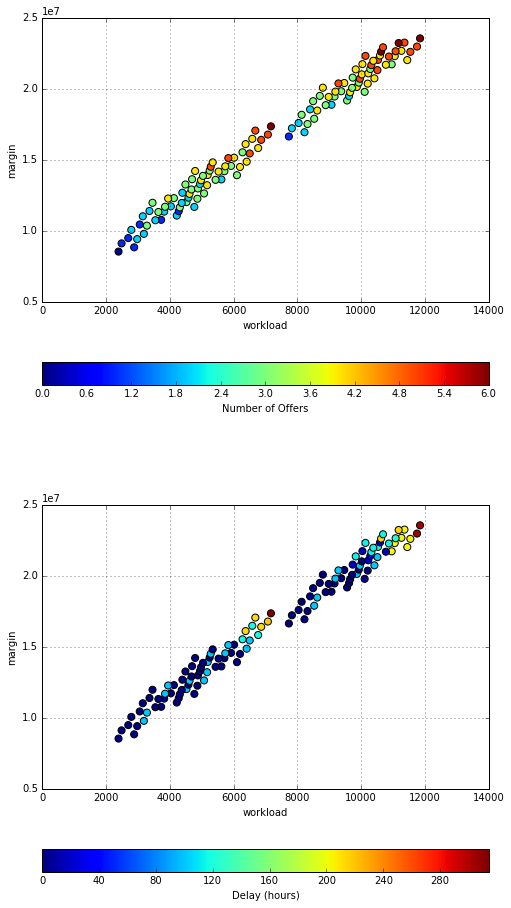

NameError: name 'fitness_' is not defined

In [8]:

def plot_scatter_dynam(delay):
    fitness_ = fitness_b[fitness_b.delay <= delay]
    select = scatter_plot(fitness_.baselines.tolist(), 'workload', 'margin', df = fitness_)
    
    
interact(plot_scatter_dynam, delay=(0, fitness_b.delay.max() , 10))
print(fitness_)

### SELECTION: preliminary selection rule for the best baseline

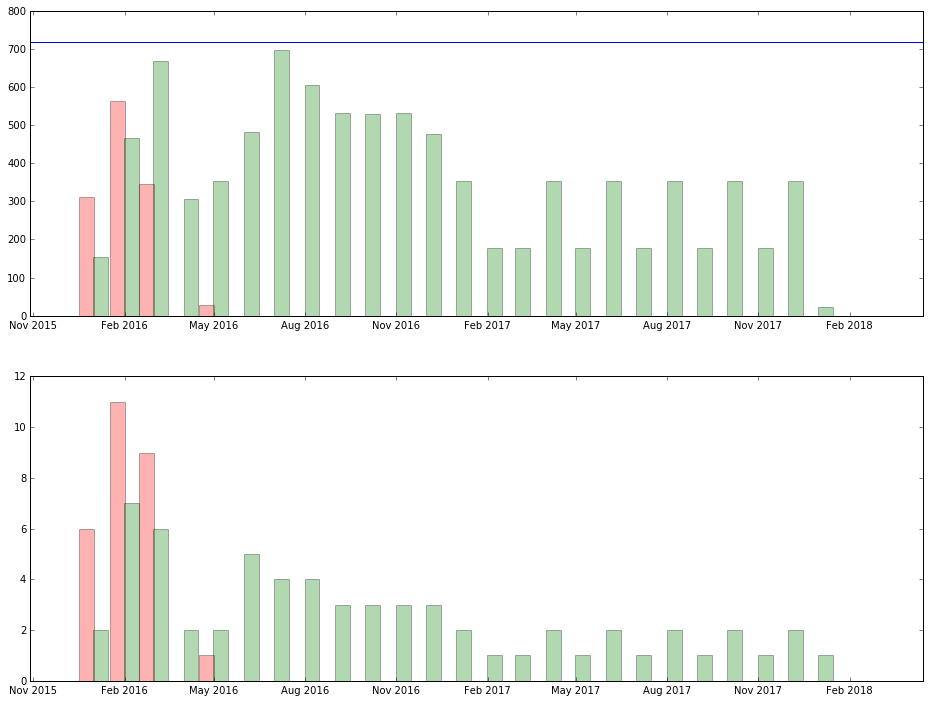

In [6]:
fitness_ = fitness_b[fitness_b.delay <= 0]
fitness_ = fitness_.sort_values(['margin','workload','number'],ascending=[False,False,True])
baseline = fitness_.iloc[0].baselines

schedule(baseline)

### FILLING: combine the fillers to get the schedules

In [7]:
start = time.clock()
schedules = bc.filling(baseline)
print(len(schedules), 'Schedules Filled in {0:.3f} sec.\n'
                                                .format(time.clock()-start))

Number of Fillers: 1
Number of Fillers: 0
Number of Fillers: 2
Number of Fillers: 6
Number of Fillers: 7
Number of Fillers: 7
Number of Fillers: 7
100 Schedules Filled in 22.304 sec.



### FITNESS: compute the fitness for the FILLED SCHEDULES

In [8]:
start = time.clock()
fitness = bc.compute_fitness(schedules, opportunities=opportunities,\
                                                          batches = batches)

print('Fitness Computed in {0:.3f} sec.\n'.format(time.clock()-start))

Fitness Computed in 5.488 sec.



# Diagnostic Plot

### Distribution of the Combinations

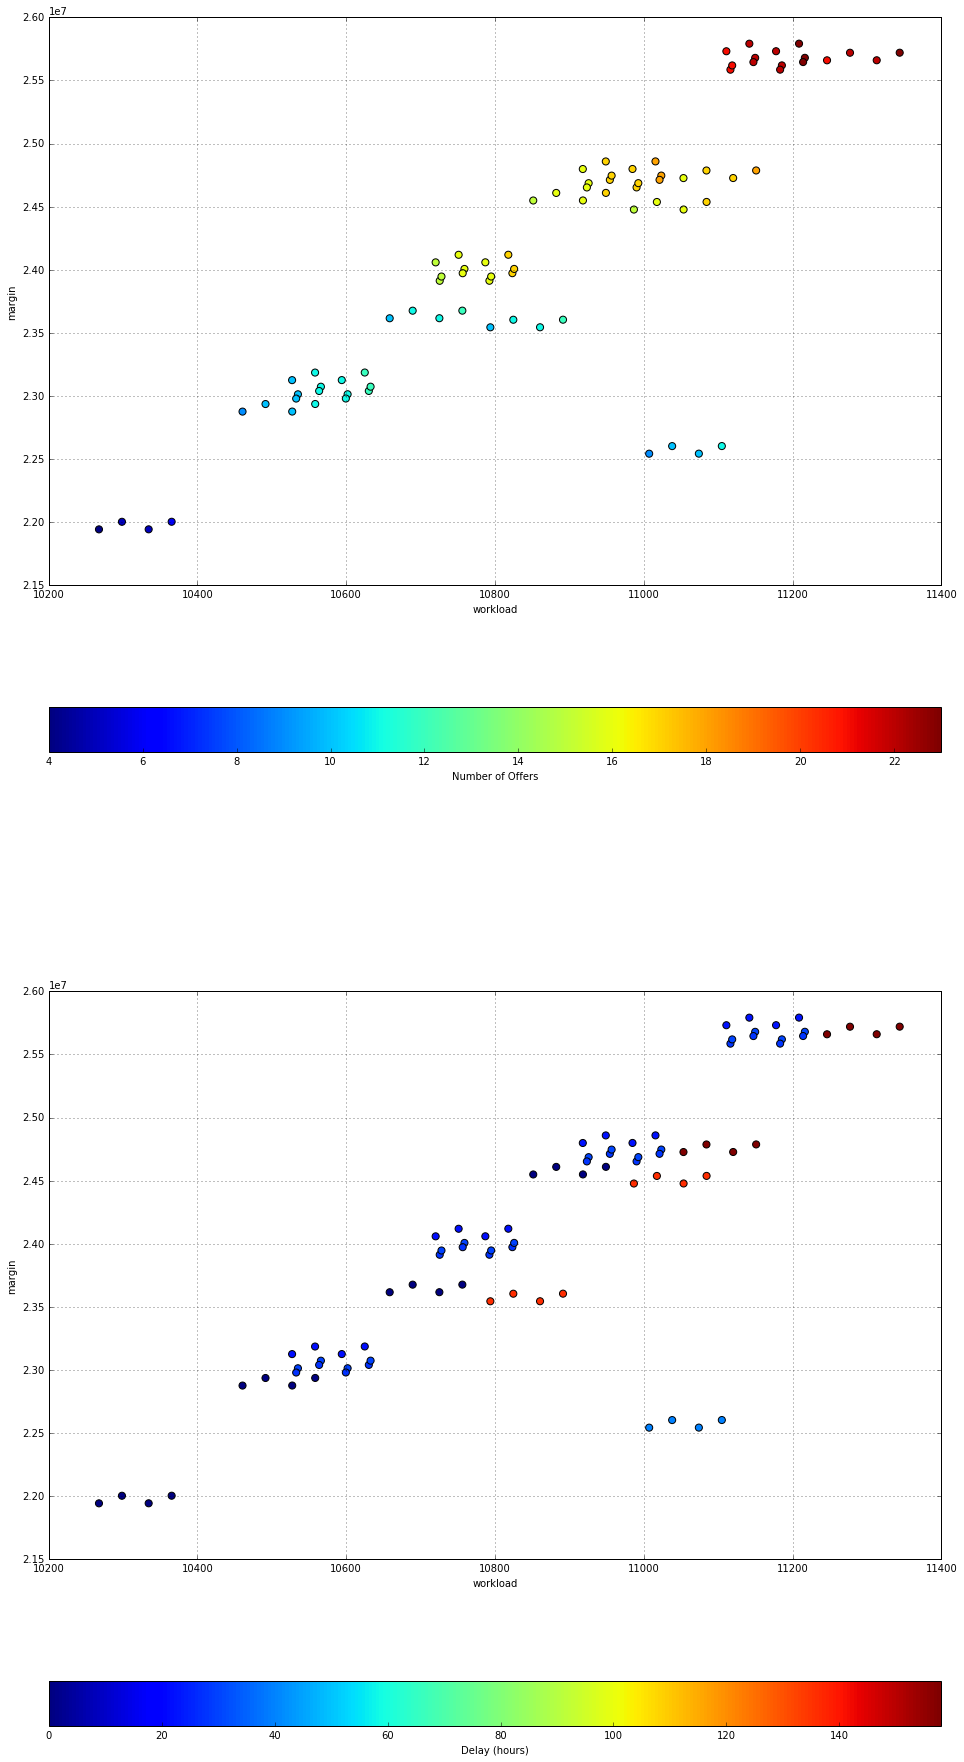

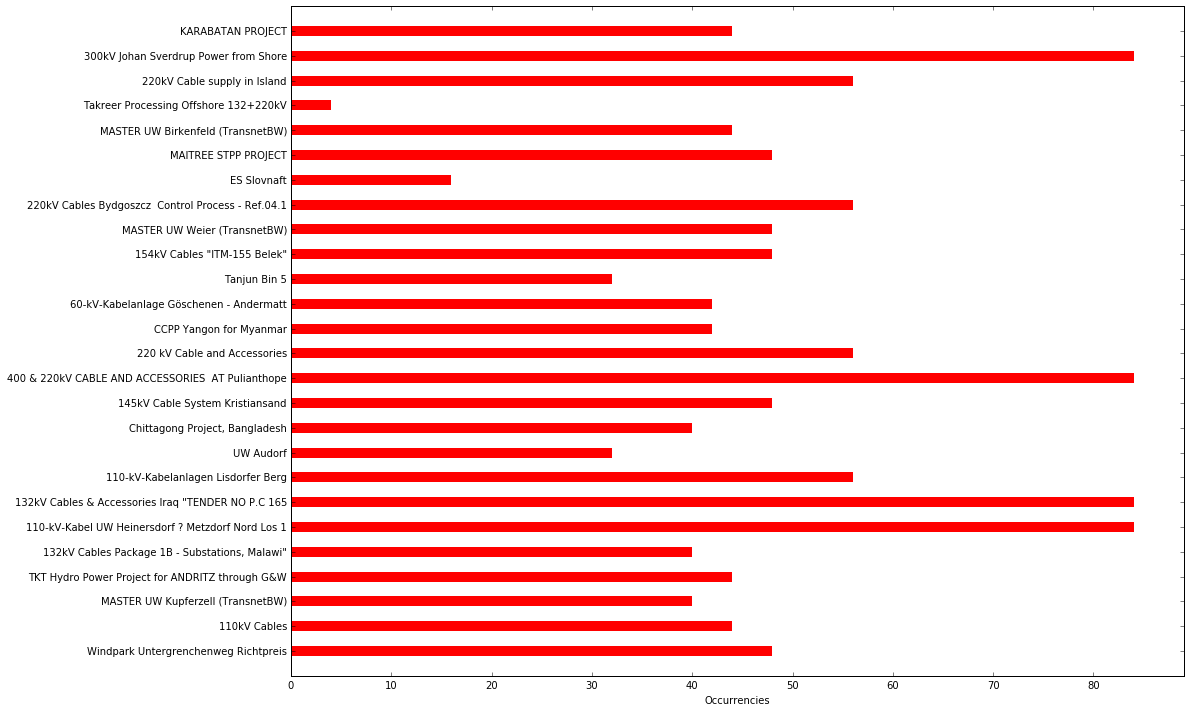

In [9]:
def plot_scatter_dynam(delay):
    fitness_p = fitness[fitness.delay <= delay]
    scatter_plot(fitness_p.baselines.tolist(), 'workload', 'margin', df = fitness_p)
    
    frequency_plot(fitness_p.baselines.tolist(),opportunities = opportunities)
    
interact(plot_scatter_dynam, delay=(0, fitness.delay.max() , 10))

### Selection of the "Best" Combination of Offers

In [10]:
sel_fit = copy(fitness)
sel_fit = sel_fit[sel_fit.delay < 20]

sel_fit = sel_fit.sort_values(['workload', 'margin'],ascending=[False,False])

### Workload Distribution 

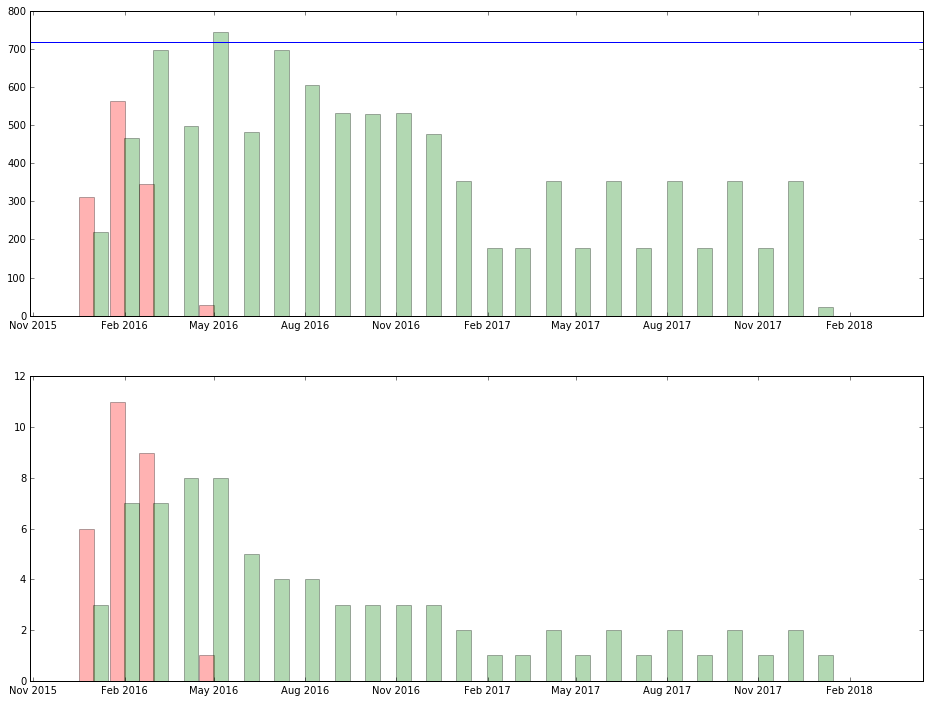

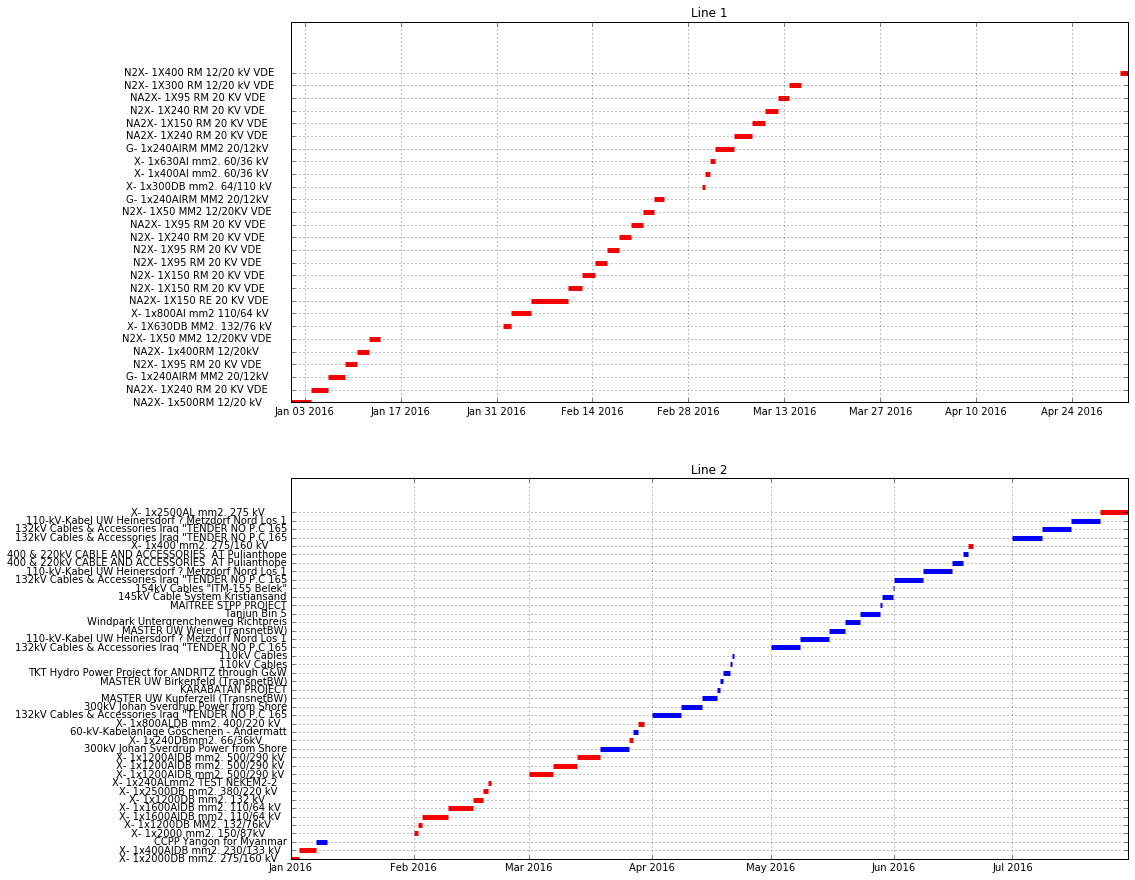

In [12]:
def distr_overwiew(num):
    tmp_sel_fit = sel_fit.iloc[num]
    schedule(tmp_sel_fit.baselines)
    time_table(tmp_sel_fit.baselines, batches = batches)
    tmp_sel_fit
    
interact(distr_overwiew, num=(0,len(sel_fit)-1 , 1))

### Questions:
 - Strategy for the Baseline selection
 - Strategy for the Schedule selection
 - More diagnostic plots 

In [19]:

from __future__ import print_function
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
#from matplotlib.patches import Rectangle
#from matplotlib.text import Text
#from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand

x, y, c, s = rand(4, 100)
aaa = []

def onpick3(event):
    ind = event.ind
    print('onpick3 scatter:', ind, np.take(x, ind), np.take(y, ind))
    
    return ind

fig, ax = plt.subplots()
col = ax.scatter(x, y, 100*s, c, picker=True)

ind = fig.canvas.mpl_connect('pick_event', onpick3)
aaa.append(ind)
plt.show()

onpick3 scatter: [80] [ 0.61561373] [ 0.02004336]


In [18]:
aaa

[6]